<a href="https://colab.research.google.com/github/macscheffer/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2018 talks

In [0]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

### 2. List Comprehension

### 3. Filter with named function

### 4. Filter with anonymous function

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

### long title

### first letter

### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [0]:
!pip install textstat

## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

Titles sorted reverse alphabetically

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

Percentage of talks with long titles

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

Histogram of title lengths, in characters

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count
- description grade level (use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** these questions:
- Which descriptions could fit in a tweet?
- What's the distribution of grade levels? Plot a histogram.



In [0]:
import requests
import bs4

url = 'https://us.pycon.org/2018/schedule/talks/list/'
result = requests.get(url)
soup = bs4.BeautifulSoup(result.text)

In [0]:
soup.select('.presentation-description')[0].text.strip()

In [0]:
descriptions = [tag.text.strip() for tag in soup.select('.presentation-description')]
titles = [tag.text.strip() for tag in soup.select('h2')]
len(descriptions), len(titles)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [0]:
df = pd.DataFrame({'description':descriptions})
df.head()

In [0]:
df['description char count'] = df.description.apply(len)
df.head()

In [0]:
!pip install textstat

In [0]:
import textstat

# use textstat to count words.

df['description word count'] = df.description.apply(textstat.lexicon_count)
df.head()

In [0]:
# readability by grade level using the Flesh-Kincaid grade level
# FK grade levels 0-18
# 0-6: Basic, 7-12: Average, 12-18: Skilled
df['description FK grade level'] = df.description.apply(textstat.flesch_kincaid_grade)
df.head()

In [0]:
# looks like we have one value that is way too high. might want to categorize them.
df['description FK grade level'].describe()

In [0]:
import numpy as np
criteria = [((df['description FK grade level'] >= 0) & (df['description FK grade level'] < 6)),
            ((df['description FK grade level'] >= 6) & (df['description FK grade level'] < 12)),
            ((df['description FK grade level'] >= 12))]
values = ['Basic', 'Average', 'Skilled']

df['description FK category'] = np.select(criteria,values)
df.head()

In [0]:
df['description FK category'].value_counts().plot.barh(title='Counts for each FK category');

In [41]:
df.describe()

,description char count,description word count,description FK grade level
count,95.000000,95.000000,95.000000
mean,846.063158,134.578947,18.117895
std,450.107713,70.019082,15.835652
min,201.000000,35.000000,3.700000
25%,550.000000,91.500000,10.500000
50%,758.000000,119.000000,13.800000
75%,978.000000,149.500000,17.950000
max,2794.000000,436.000000,107.800000


In [45]:
list(df['description'][df['description char count'] < 280])[0]

'A function is a small chunk of code that does useful work. Your job when writing a function is to do it in a way that it easy to read. Based on over 15 years of code reviews here are some tips and guidelines I give again and again.'

In [0]:
df['tweetable description'] = df['description char count'] <= 280

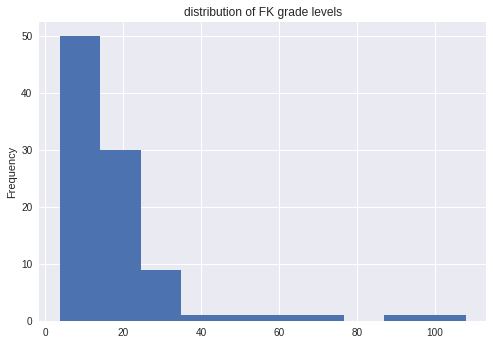

In [50]:
df['description FK grade level'].plot.hist(title='distribution of FK grade levels');

In [0]:
df['description FOG grade level'] = df.description.apply(textstat.gunning_fog)
df['description SMOG grade level'] = df.description.apply(textstat.smog_index)
df.head()

In [0]:
df['mean grade level'] = (df['description FK grade level'] + df['description FOG grade level'] + df['description SMOG grade level']) / 3
df.head()

In [0]:
df['description char per word'] = df['description char count'] / df['description word count']

In [58]:
df['description char per word'].corr(df['mean grade level'])

0.23682716077028224

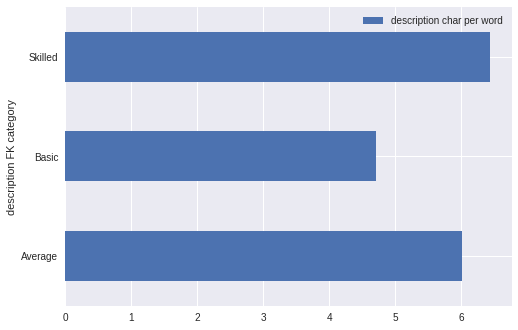

In [62]:
df.pivot_table(values = 'description char per word', index='description FK category').plot.barh()

In [63]:
df.head()

,description,description char count,description word count,description FK grade level,description FK category,tweetable description,description FOG grade level,description SMOG grade level,mean grade level,description char per word
0,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...,440,78,7.4,Average,False,10.88,10.1,9.460000,5.641026
1,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin...",881,141,14.3,Skilled,False,22.63,14.8,17.243333,6.248227
2,"In this talk, youâll learn about a category of security issue known as side channel attacks. Youâll be amused to see how features like automatic data compression, short-circuit execution, and ...",647,96,11.9,Average,False,20.15,12.7,14.916667,6.739583
3,"âSo tell me,â my manager said, âwhat is an average?â\r\n\r\nThereâs probably nothing worse than that sinking feeling when you finish an analysis, email it to your manager or client to re...",1080,178,16.0,Skilled,False,21.66,16.2,17.953333,6.067416
4,"Recommender systems have become increasingly popular in recent years, and are used by some of the largest websites in the world to predict the likelihood of a user taking an action on an item. In ...",1147,188,18.0,Skilled,False,24.83,16.9,19.910000,6.101064


In [64]:
df.describe()

,description char count,description word count,description FK grade level,description FOG grade level,description SMOG grade level,mean grade level,description char per word
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,846.063158,134.578947,18.117895,24.472526,11.301053,17.963825,6.267946
std,450.107713,70.019082,15.835652,16.271255,6.174613,9.967380,0.710161
min,201.000000,35.000000,3.700000,8.970000,0.000000,5.256667,4.714286
25%,550.000000,91.500000,10.500000,16.835000,10.350000,13.323333,5.897569
50%,758.000000,119.000000,13.800000,20.860000,13.000000,15.656667,6.169421
75%,978.000000,149.500000,17.950000,24.820000,15.200000,18.995000,6.447011
max,2794.000000,436.000000,107.800000,116.220000,23.500000,74.673333,11.252874


In [65]:
df.corr()

,description char count,description word count,description FK grade level,tweetable description,description FOG grade level,description SMOG grade level,mean grade level,description char per word
description char count,1.000000,0.985292,0.343671,-0.247932,0.320781,0.390501,0.437192,0.208842
description word count,0.985292,1.000000,0.313552,-0.237434,0.291827,0.373687,0.402013,0.051412
description FK grade level,0.343671,0.313552,1.000000,-0.107201,0.995590,-0.431439,0.982243,0.195490
tweetable description,-0.247932,-0.237434,-0.107201,1.000000,-0.110035,-0.198974,-0.157734,-0.215108
description FOG grade level,0.320781,0.291827,0.995590,-0.110035,1.000000,-0.438929,0.980761,0.182741
description SMOG grade level,0.390501,0.373687,-0.431439,-0.198974,-0.438929,1.000000,-0.260832,0.163979
mean grade level,0.437192,0.402013,0.982243,-0.157734,0.980761,-0.260832,1.000000,0.236827
description char per word,0.208842,0.051412,0.195490,-0.215108,0.182741,0.163979,0.236827,1.000000
